In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [5]:
sample_text = """Miss Brill is the story of an old woman told brilliantly and realistically, balancing thoughts and emotions 
that sustain her late solitary life amidst all the bustle of modern life. Miss Brill is a regular visitor on Sundays to the
Jardins Publiques (the Public Gardens) of a small French suburb where she sits and watches all sorts of people come and go. 
She listens to the band playing, loves to watch people and guess what keeps them going and enjoys contemplating the world as a 
great stage upon which actors perform. She finds herself to be another actor among the so many she sees, or at least herself 
as 'part of the performance after all.'...One Sunday Miss Brill puts on her fur and goes to the Public Gardens as usual.
The evening ends with her sudden realization that she is old and lonely, a realization brought to her by a conversation she
overhears between a boy and a girl presumably lovers, who comment on her unwelcome presence in their vicinity. 
Miss Brill is sad and depressed as she returns home, not stopping by as usual to buy her Sunday delicacy, a slice of honey-cake.
She retires to her dark room, puts the fur back into the box and imagines that she has heard something cry."""

In [6]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(sample_text)
updated = []
for sentence in sentences:
    sentence  = sentence.replace("\n", "")
    updated.append(sentence)
print(updated)

['Miss Brill is the story of an old woman told brilliantly and realistically, balancing thoughts and emotions that sustain her late solitary life amidst all the bustle of modern life.', 'Miss Brill is a regular visitor on Sundays to theJardins Publiques (the Public Gardens) of a small French suburb where she sits and watches all sorts of people come and go.', 'She listens to the band playing, loves to watch people and guess what keeps them going and enjoys contemplating the world as a great stage upon which actors perform.', "She finds herself to be another actor among the so many she sees, or at least herself as 'part of the performance after all.", "'...One Sunday Miss Brill puts on her fur and goes to the Public Gardens as usual.", 'The evening ends with her sudden realization that she is old and lonely, a realization brought to her by a conversation sheoverhears between a boy and a girl presumably lovers, who comment on her unwelcome presence in their vicinity.', 'Miss Brill is sad

In [7]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(updated)]

In [8]:
max_epochs = 100
vec_size = 10
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

#model.save("d2v1.model")
#print("Model Saved")

C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\e1077926\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [9]:
print(len(model.docvecs))

8


In [10]:
x = []
for index in range(len(model.docvecs)): 
    x.append(model.docvecs[index])

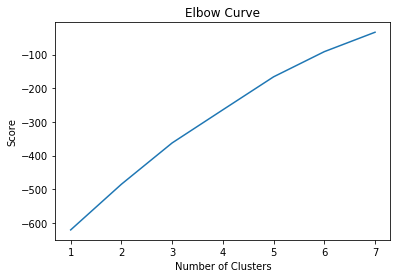

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [12]:
model = KMeans(n_clusters = 3)
model.fit(x)
labels = model.labels_
print(labels)
centroids = model.cluster_centers_
print(centroids )
#labels = kmeans.predict(x)
#centroids = kmeans.cluster_centers_
#print(labels)

[0 1 0 0 1 2 1 1]
[[ 2.24783583  3.00287328 -2.25509501 -3.84544253 -0.25973082  2.0035314
  -1.39657887 -5.28017171 -2.35843877  0.45746191]
 [-2.52979656 -0.98214096 -0.36267081 -3.13841757 -2.58069775  0.01430187
   1.38760418 -3.13209867 -1.26829146  3.78195983]
 [-0.30792403  1.41127253 -4.14077425  1.4793061  -0.58815116 -0.96642268
  -0.95589173 -8.61404705  7.20870209  3.36097264]]


In [13]:
import numpy as np 

cluster_arr = np.array(labels) 
cluster = np.unique(cluster_arr) 
print(cluster)
        

[0 1 2]


In [69]:
print(updated[i-1])

Miss Brill is sad and depressed as she returns home, not stopping by as usual to buy her Sunday delicacy, a slice of honey-cake.


In [76]:
from scipy.spatial import distance

rows, cols = (len(cluster), len(x)) 
cluster_data=np.zeros((rows,cols))
original_data = np.zeros((rows,cols), dtype = int)
print(cluster_data.shape)
row_counter = np.zeros(rows, dtype = int)

for i in range(1,len(x)):
    #print(i,labels[i-1],row_counter[labels[i-1]], distance.euclidean(x[i-1], centroids[labels[i-1]]))
    
    cluster_data[labels[i-1], row_counter[labels[i-1]]] = distance.euclidean(x[i-1], centroids[labels[i-1]])
    #print(updated[i-1])
    original_data[labels[i-1], row_counter[labels[i-1]]] = i-1                            
    row_counter[labels[i-1]]= row_counter[labels[i-1]]+1
    #print(original_data)
    #print(cluster_data)
    #print(row_counter)

cluster_data[cluster_data == 0] = 9999
print(cluster_data)
print(original_data)
    

(3, 8)
[[8.24271376e+00 8.08608291e+00 6.58542687e+00 9.99900000e+03
  9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03]
 [8.57140841e+00 4.40791521e+00 6.45961030e+00 9.99900000e+03
  9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03]
 [9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03
  9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03]]
[[0 2 3 0 0 0 0 0]
 [1 4 6 0 0 0 0 0]
 [5 0 0 0 0 0 0 0]]


In [88]:
result = np.zeros(rows, dtype = int)
result_sent = np.zeros(rows, dtype = int)
for i in range(1,len(cluster)):
    #print(cluster_data[i-1,:])
    arr = cluster_data[i-1,:]
    print(arr,np.amin(arr) )
    res = np.where(arr == np.amin(arr))
    print(res[0])
    result[i-1] = res[0]
    result_sent[i-1] = original_data[i-1, res[0]]
print(result)
print(result_sent)
result_sent.sort()
print(result_sent)
for i in range(0,len(result_sent)):
    print(i, result_sent[i])
    print(i, updated[result_sent[i]])


[8.24271376e+00 8.08608291e+00 6.58542687e+00 9.99900000e+03
 9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03] 6.585426874922403
[2]
[8.57140841e+00 4.40791521e+00 6.45961030e+00 9.99900000e+03
 9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03] 4.407915209648761
[1]
[2 1 0]
[3 4 0]
[0 3 4]
0 0
0 Miss Brill is the story of an old woman told brilliantly and realistically, balancing thoughts and emotions that sustain her late solitary life amidst all the bustle of modern life.
1 3
1 She finds herself to be another actor among the so many she sees, or at least herself as 'part of the performance after all.
2 4
2 '...One Sunday Miss Brill puts on her fur and goes to the Public Gardens as usual.
